In [1]:
# notebook setup

import pandas as pd
import matplotlib as plt

# show charts
%matplotlib inline
# show all columns & rows
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [2]:
plots = pd.read_csv('data/WA_PLOT.csv', index_col='CN', 
                    usecols=['CN', 'COUNTYCD', 'MEASYEAR', 'MEASMON', 'LAT', 'LON', 'ELEV'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11f1e69470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f11efcf3a20>]], dtype=object)

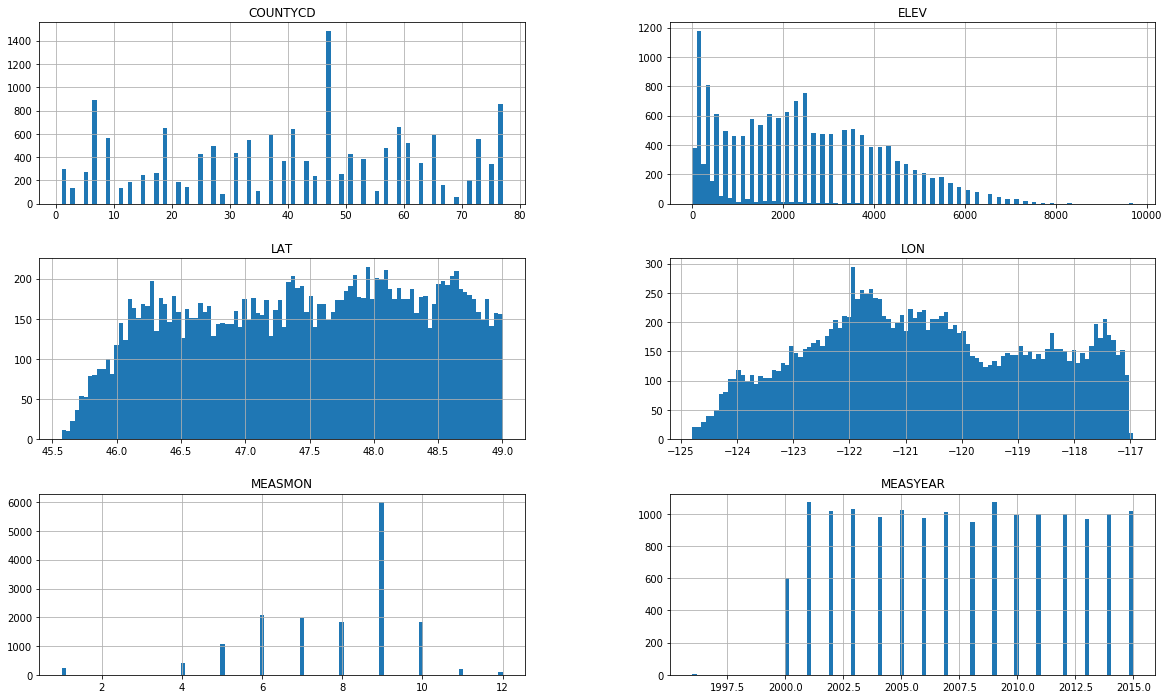

In [3]:
plots.hist(bins=100, figsize=(20,12)) # start simple

- counties: some have many plots and others few, but county size varies a lot so this isn't very interesting
- elevation: seems to roughly match elevation of state, although I suspect 1k-3k  is over represented
- latitude: sharp drop at top matches state's northern border, otherwise pretty evenly distributed
- longitude: -122..-120 corresponds to Cascade range
- month: September is very busy for some reason, the winter months understandably less so
- year: very evenly distributed. previous notebook showed inventory year 2001 with many more than other years. Seems that's because the measurements started in 2000

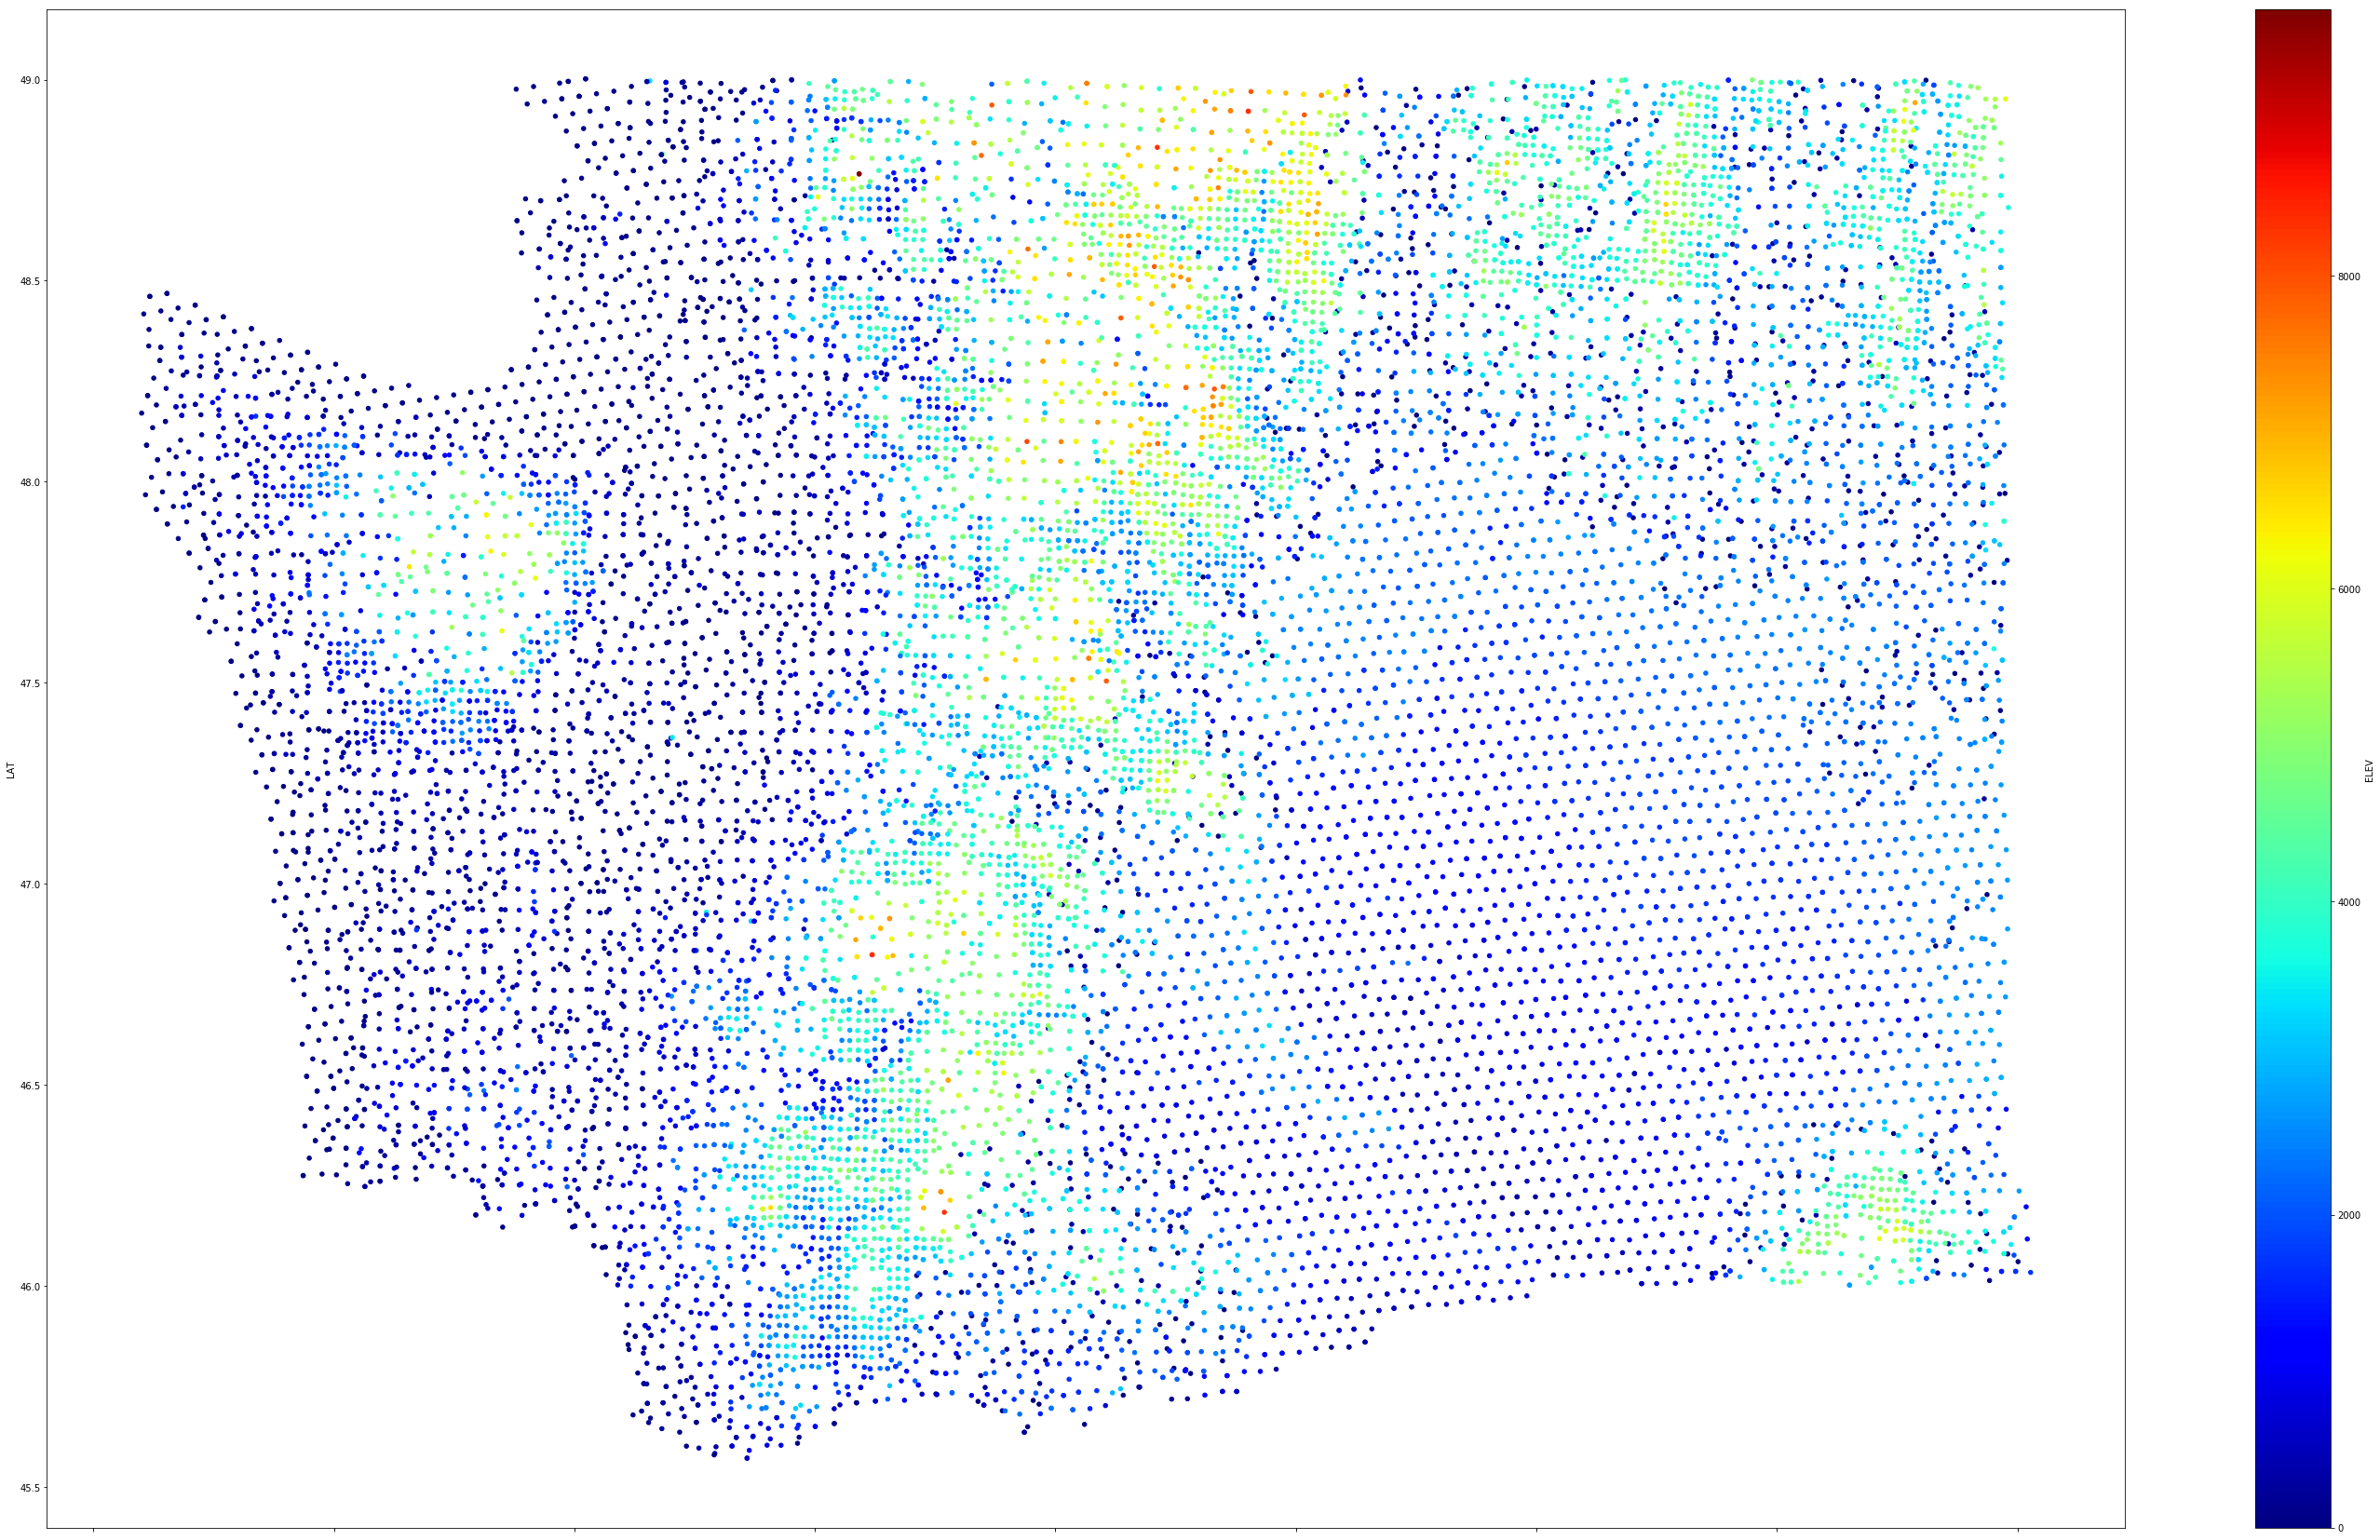

In [4]:
# use elevation for location context
plots.plot(kind="scatter", x="LON", y="LAT", figsize=(50,30), 
           c="ELEV", cmap=plt.pyplot.get_cmap("jet"), colorbar=True)

We can see that the entire state is covered, but some places are more thoroughly inventoried than others.
Foothills & mountains seems to get the most attention, while the Columbia Basin and remote mountain areas get less.
Puget sound is not visible because of location fuzzing.

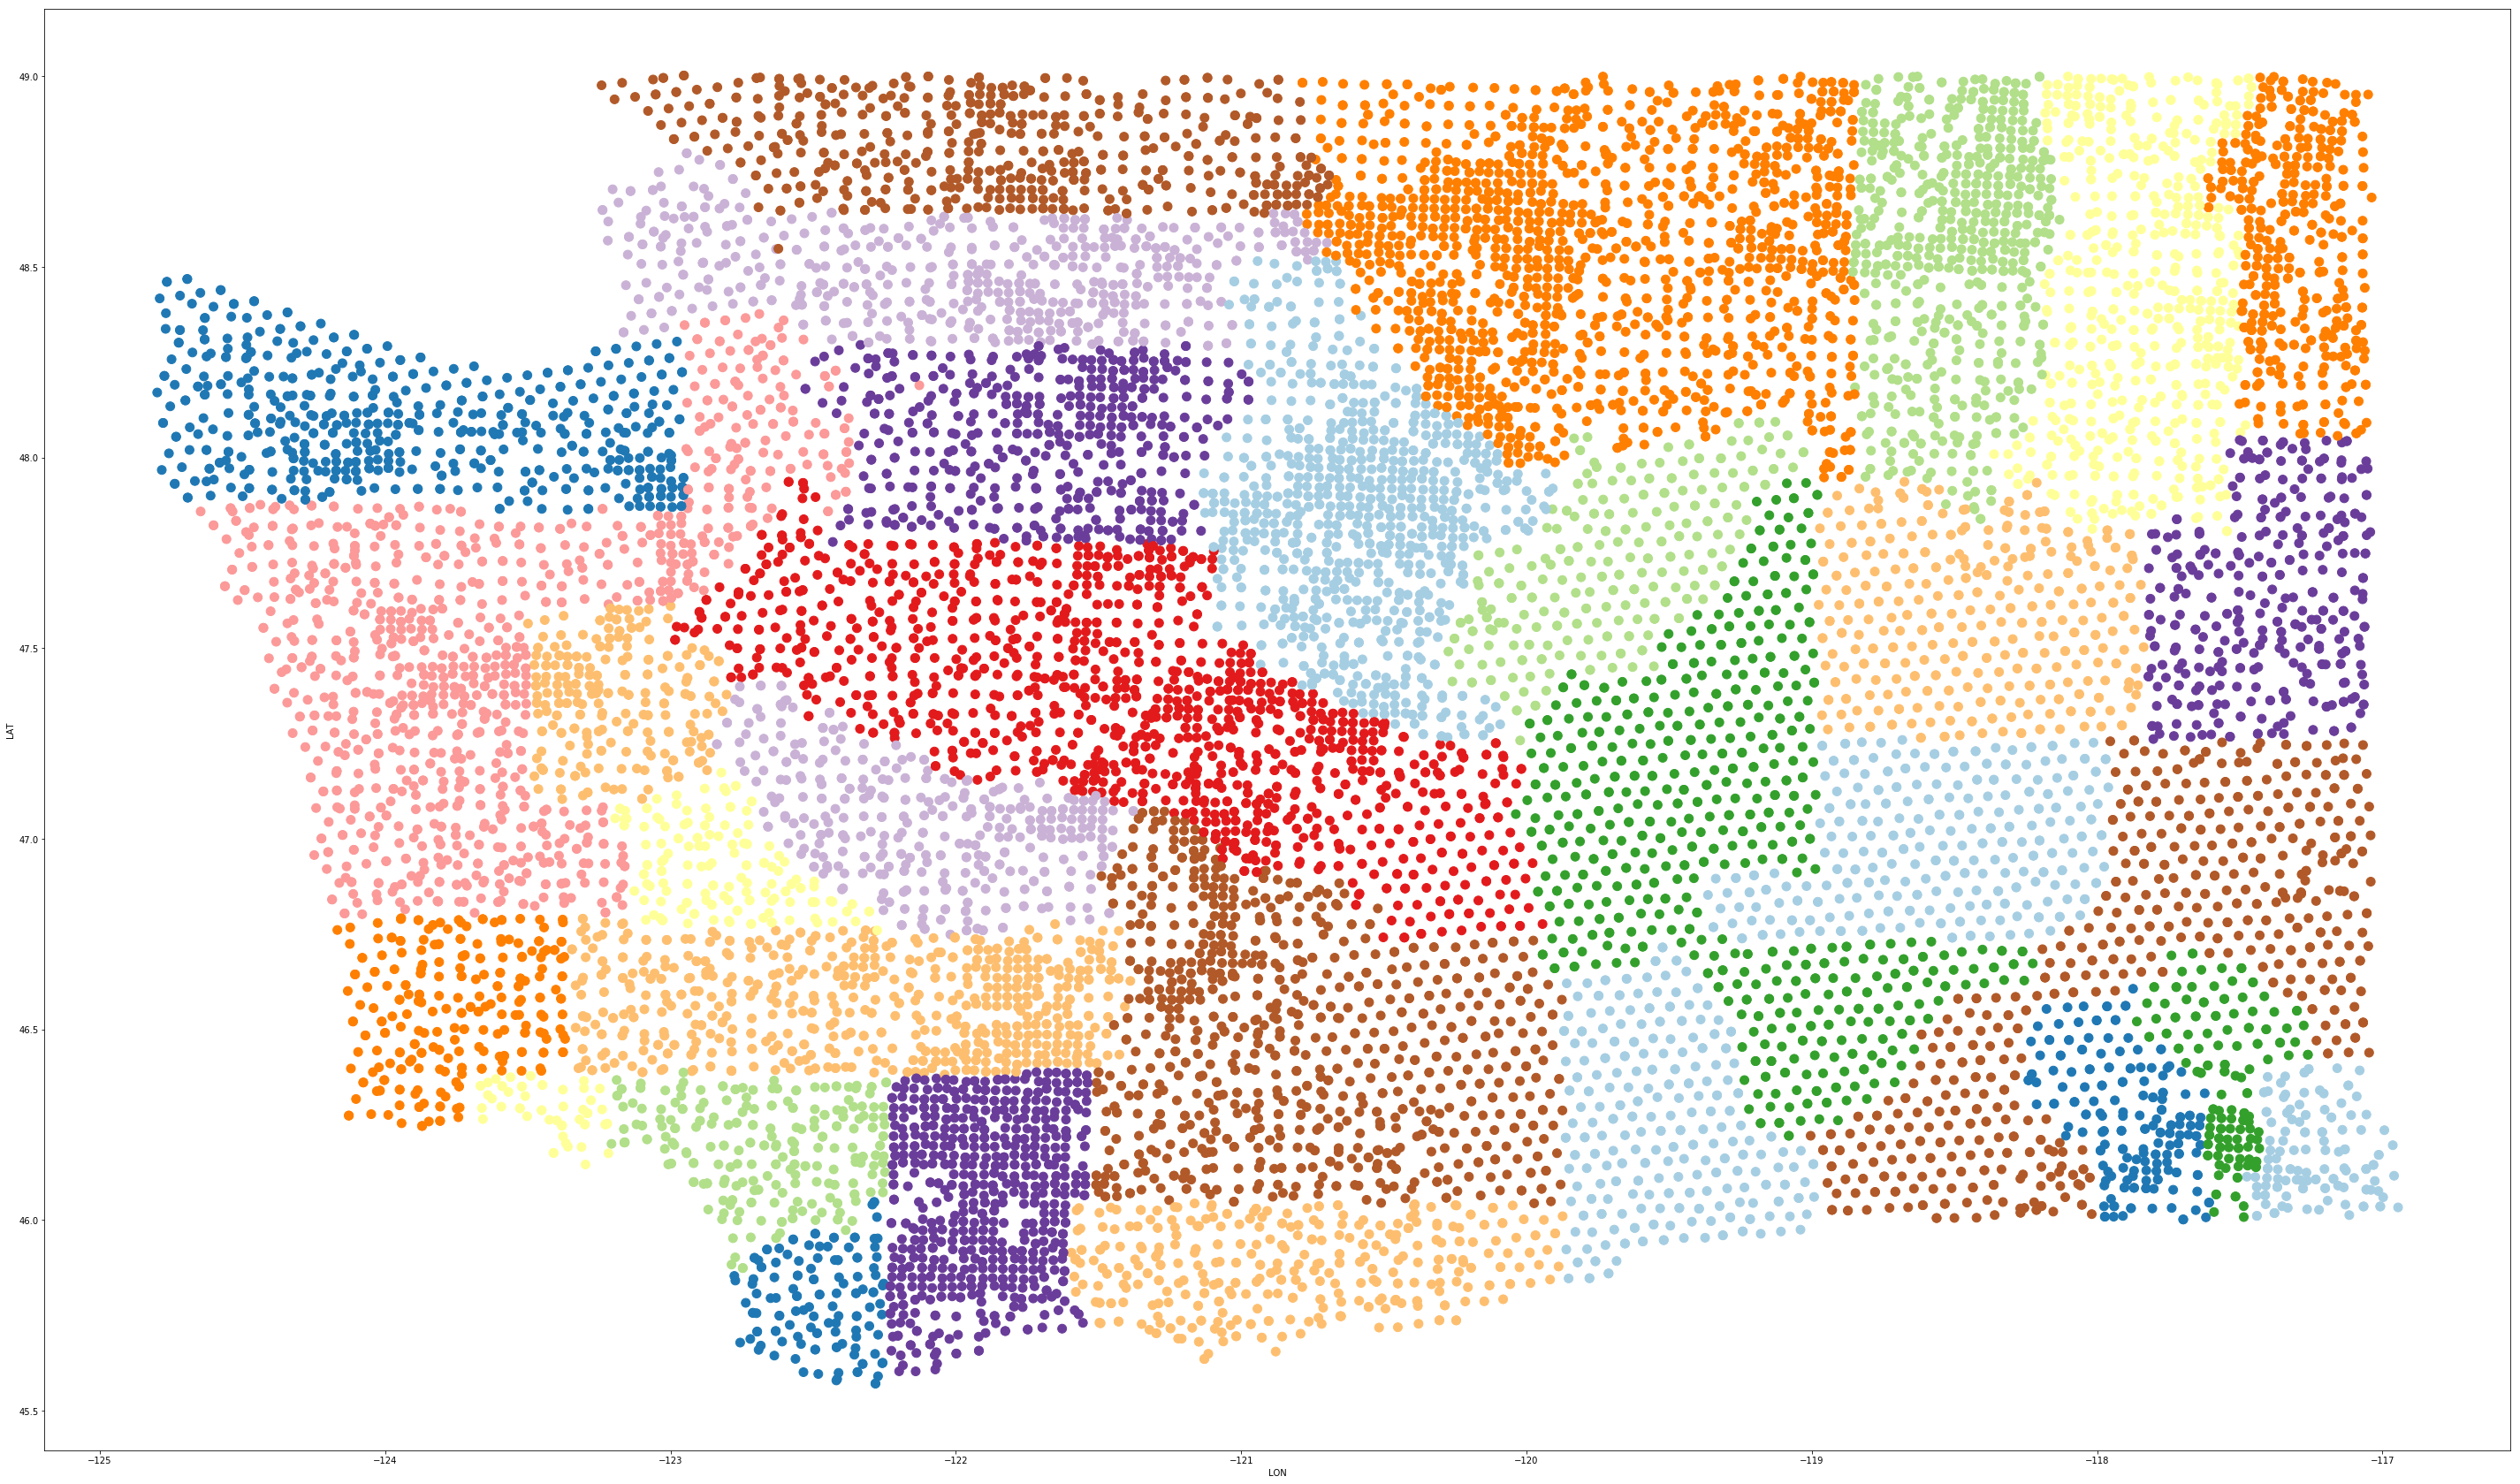

In [5]:
# Using county borders for context, above map is easier on the eyes
plots.plot(kind="scatter", x="LON", y="LAT", figsize=(50,30), s=100, 
           c="COUNTYCD", cmap=plt.pyplot.get_cmap("Paired"), colorbar=False)

# To resolve "IOPub data rate exceeded." error, stop notebook server and restart like so:
    # jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

### Trees

In [6]:
trees = pd.read_csv('data/WA_TREE.csv', index_col='CN',
                   usecols=['CN', 'PLOT', 'COUNTYCD', 'SPCD', 'DIA', 'HT'])

min: 1
median: 45.0
mean: 55.20124041129427
mode: 37
p80: 84.0
max: 319


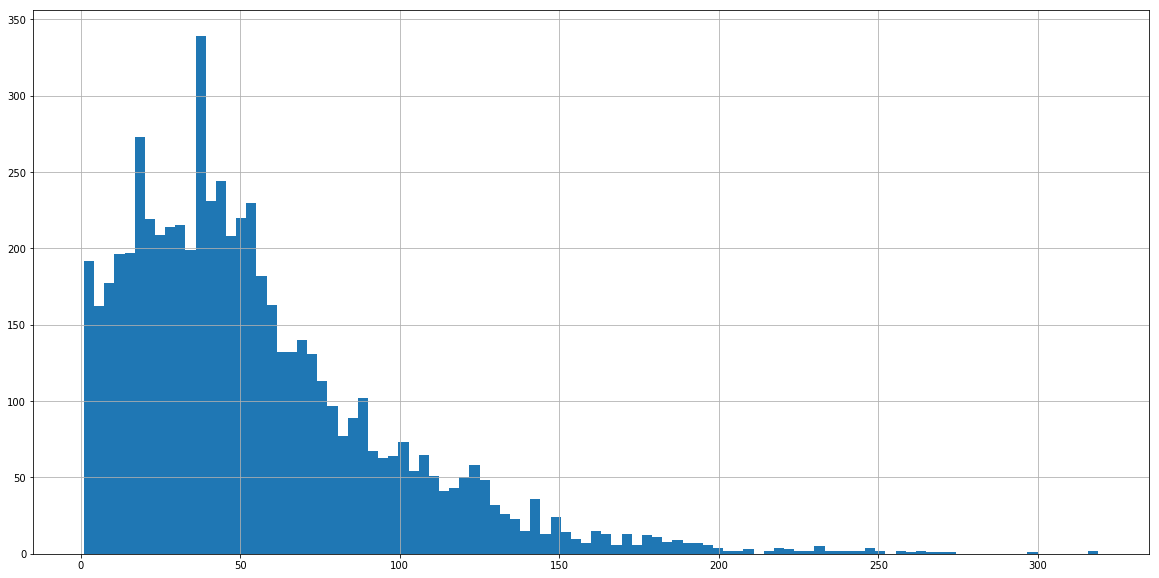

In [7]:
# how are trees distributed over plots?
tree_counts = trees.PLOT.value_counts()
print('min: {}'.format(tree_counts.min()))
print('median: {}'.format(tree_counts.median()))
print('mean: {}'.format(tree_counts.mean()))
print('mode: {}'.format(tree_counts.mode()[0]))
print('p80: {}'.format(tree_counts.quantile(.8)))
print('max: {}'.format(tree_counts.max()))

tree_counts.hist(bins=100, figsize=(20,10))

# note: plots are about an acre
# no surprises here

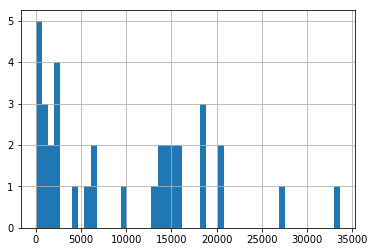

In [8]:
# how are trees distributed over counties?
trees.COUNTYCD.value_counts().hist(bins=50)

# trees per county varies wildly; explained by significant county size differences and 
# plot density differences seen in map above

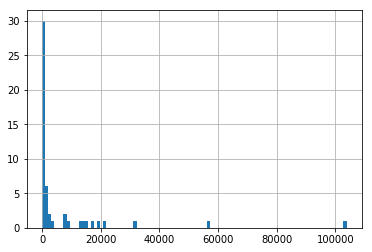

In [9]:
# how many species? their dist?
species_counts = trees.SPCD.value_counts()

species_counts.hist(bins=100)
# lots of rare species and a few very common

In [10]:
# what are the 10 most common species?
common_trees = species_counts.sort_values(ascending=False).head(10)

# to get names
species = pd.read_csv('data/REF_SPECIES.csv', index_col='SPCD')

for i, x in common_trees.iteritems():
    sp = species.loc[i]
    print('{} of {} ({} {})'.format(x, sp.COMMON_NAME, sp.GENUS, sp.SPECIES))

103834 of Douglas-fir (Pseudotsuga menziesii)
56778 of western hemlock (Tsuga heterophylla)
32073 of Pacific silver fir (Abies amabilis)
21757 of lodgepole pine (Pinus contorta)
19184 of western redcedar (Thuja plicata)
17017 of subalpine fir (Abies lasiocarpa)
14600 of ponderosa pine (Pinus ponderosa)
14053 of grand fir (Abies grandis)
13466 of red alder (Alnus rubra)
9077 of western larch (Larix occidentalis)


median: 9.1
mean: 12.827994796529362
p80: 17.8


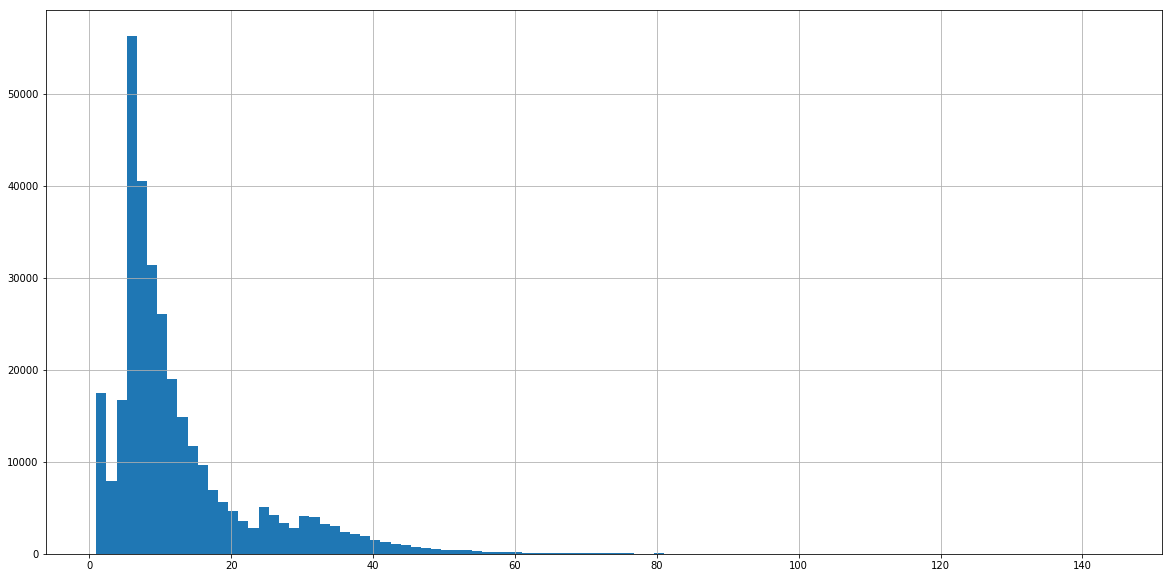

In [11]:
# Diameter distribution

print('median: {}'.format(trees.DIA.median()))
print('mean: {}'.format(trees.DIA.mean()))
print('p80: {}'.format(trees.DIA.quantile(.8)))

trees.DIA.hist(bins=100, figsize=(20,10))
# diameter is in inches, most trees aren't that big

median: 59.0
mean: 66.92674061072313
p80: 95.0


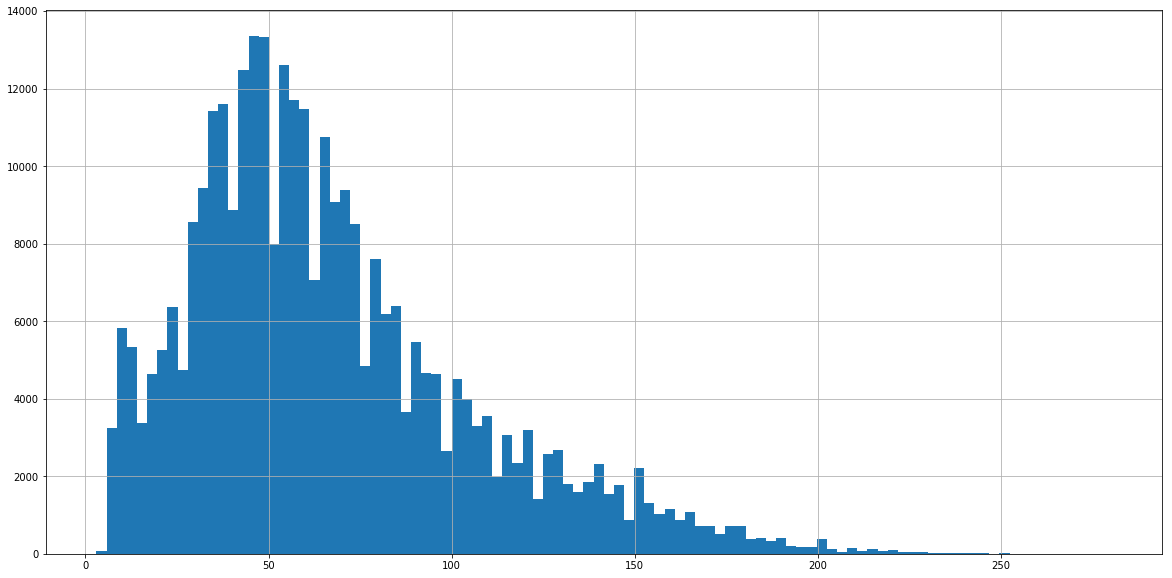

In [12]:
# height distribution

print('median: {}'.format(trees.HT.median()))
print('mean: {}'.format(trees.HT.mean()))
print('p80: {}'.format(trees.HT.quantile(.8)))

trees.HT.hist(bins=100, figsize=(20,10))
# 'average' tree is roughly 60ft tall

### next up, first swing at predicting tree species